In [62]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [63]:
df = pd.read_excel('../datasets/anova-demographics-encoded-with-clusters.xlsx')

In [64]:
df.head(2)

,age,marital_status_divorced,marital_status_married,marital_status_na,marital_status_separated,marital_status_single,marital_status_widowed,employment_Employed.Full.time,employment_Employed.Part.time,employment_Retired,employment_Self.employed,employment_Student,employment_Unemployed,Cluster
0,3,False,False,True,False,False,False,False,True,False,False,False,False,1
1,0,False,False,False,False,True,False,False,True,False,False,False,False,2


In [65]:
dataset = pd.read_excel('pca-graphs.xlsx')

In [66]:
dataset['Cluster'] = df['Cluster']

In [67]:
dataset.head(2)

,age,disability,education,employment,ethnicity,gender,income,language,marital_status,race,states,tone,Cluster
0,45-54,i do not have a disability,High School,Employed Part time,non hispanic,female,"$25,000 - $49,999",both,na,native american,indiana,Persuasive,1.0
1,18-24,i do not have a disability,High School,Employed Part time,hispanic,male,"Less than $25,000",english,single,white,illinois,Original,2.0


In [68]:
columns_to_plot = ['age', 'disability', 'education', 'employment', 'ethnicity', 'gender', 'income', 'language', 'marital_status', 'race', 'tone']

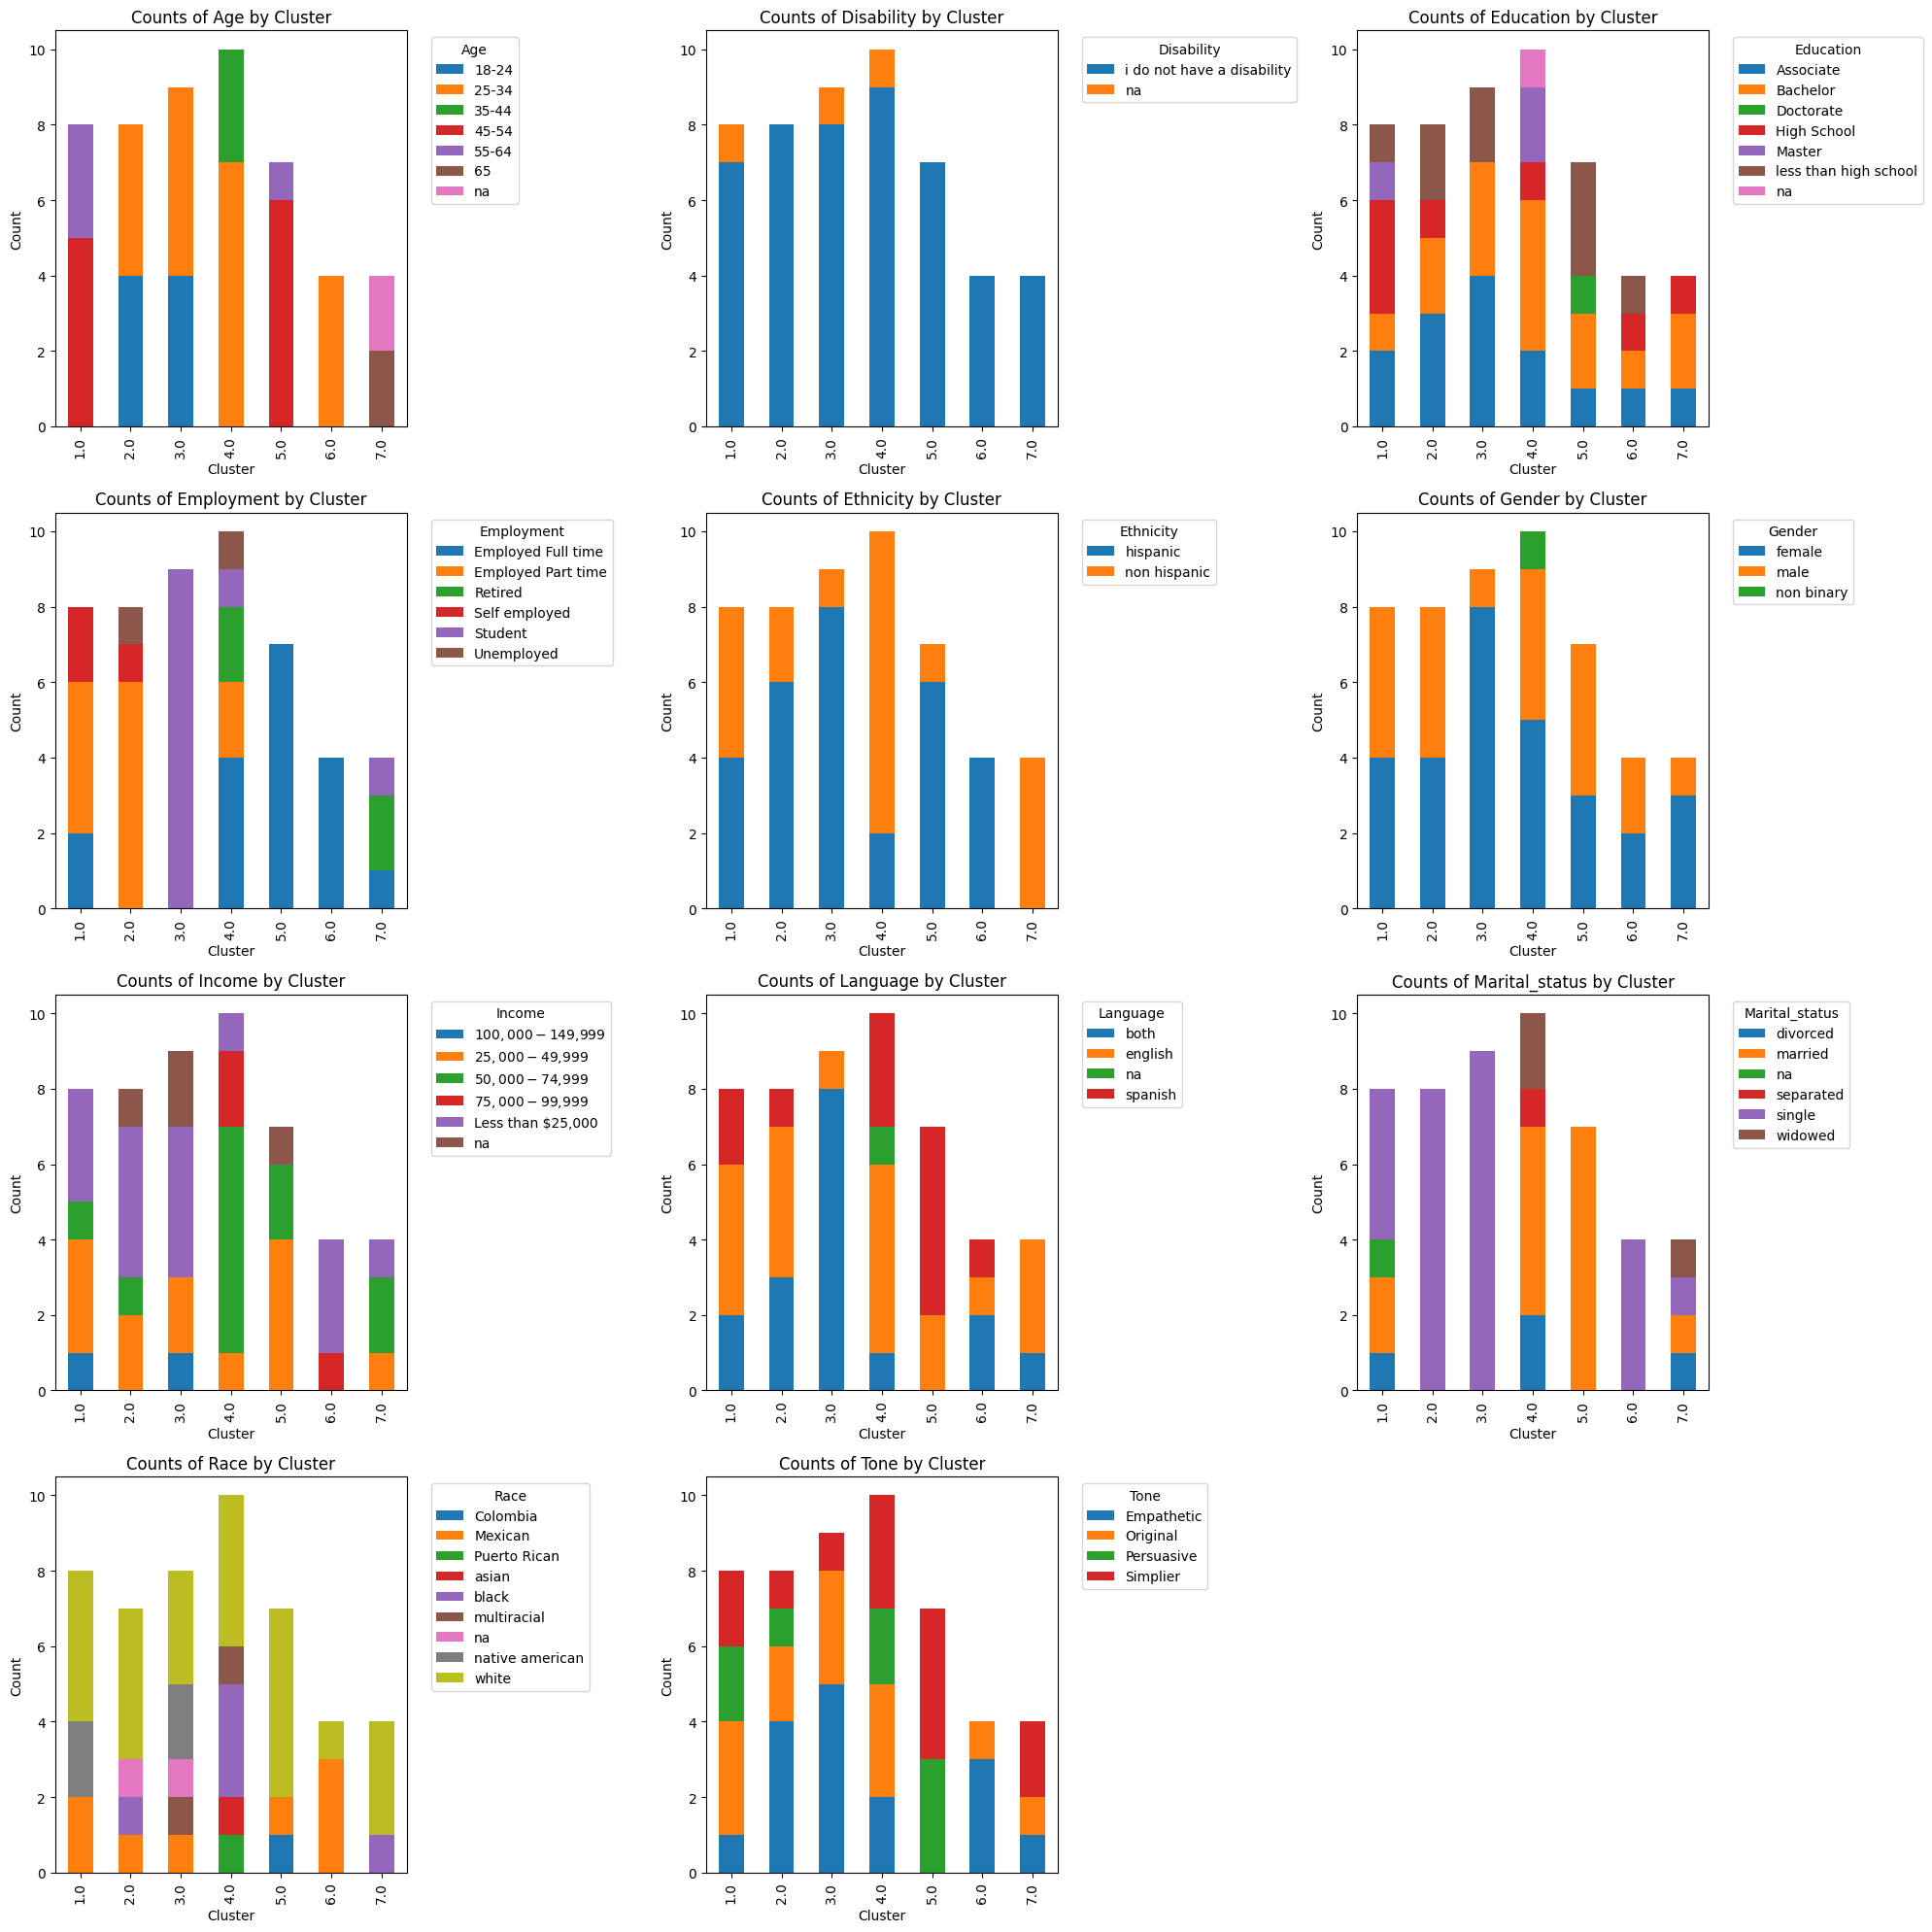

: 

In [69]:
# Number of columns and rows for the subplots grid
n_cols = 3
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Generate stacked bar charts for each column
for idx, column in enumerate(columns_to_plot):
    # Aggregate data for the given column
    cluster_option_counts = dataset.groupby(['Cluster', column]).size().unstack(fill_value=0)
    
    # Plotting the stacked bar chart on the corresponding subplot
    ax = cluster_option_counts.plot(kind='bar', stacked=True, ax=axes[idx])
    
    # Add labels and title
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.set_title(f'Counts of {column.capitalize()} by Cluster')
    ax.legend(title=column.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Adjust layout for the subplot
    plt.tight_layout()

# Remove any unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

# Show all plots
plt.show()